# Shear Strength vs Diameter of Weld

**Prepared by:** Emmanuel Barias (ebarias@nd.edu) and Vivian Okorie (vokorie3@nd.edu)

**Reference:** Exercise 7.2, problem 8, Statistics for Engineers and Scientists, Fourth Edition by Prof. William Navidi (2014).

**Intended Audience:** This problem is intended for undergraduate statistic students learning about data analysis methods.

## Import Libraries

In [ ]:
# Importing libraries
import scipy.stats as stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy.linalg as nplin

# 1. Introduction

Linear regression is a way to interpret your data and understand the relationship the variables have with one another. Using linear regression we can understand if variables have a dependance on one another. We can combine other data analysis techniques (such as covariance) and determine if the variables are truly independent. While there are quite a few steps to solve this problem, the biggest take away from this notebook should be **CORRELATION** does **NOT** mean **CAUSATION**.

## 1.1 Learning Objectives


*   Learn to perform simple linear regression given data
*   Interpret what the linear regression analysis returns
*   Perform a covariance analysis to determine independence of variables (omit this for now until you see how long the other ones take)
*   Calculate the $r^2$ value
*   Perform a residual analysis








## 1.2 Problem Statement

The following table presents shear strengths (in kN/mm) and weld diameters (in mm) for a sample of spot welds.




|_Additional Information_           ||  |
|-----------------------------------||---------------------------------|
|___Diameter___       || ___Strength___       |
|4.2          ||  51 |
|4.4          || 54      |
|4.6          || 69          |
|4.8          || 81   |
|5.0          || 75 |
|5.2          || 79  |
|5.4          || 89 |
|5.6          || 101 |
|5.8          || 98  |
|6.0          || 102 |

## 1.3 Problem Setup

In [ ]:
# Arrays for diameter and strength
diameter = np.array([4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0]) # units of mm

strength = np.array([51, 54, 69, 81, 75, 79, 89, 101, 98, 102]) # units of kN/mm

# 2. Plotting and Solving for Regression Line

To solve for the regression line, we need to use the Equation 1.1:

$$(Equation 1.1):\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

where $\hat{y}$ is our predicted value, $\hat{\beta_0}$ is the y-intercept, and $\hat{\beta_1}$ is the slope.

## Computing Regression Line Numerically

We can calculate the values for $\hat{\beta_0}$ and $\hat{\beta_1}$ numerically using the following equations:



$$(Equation 2.1): \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$


where $\bar{x}$ is the sample mean for x and $\bar{y}$ is the sample mean for y.

$$(Equation 2.2):  \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$$

For this problem, we will use scipy to calculate our regression line equation.



## 2.1 Plot the Given Data

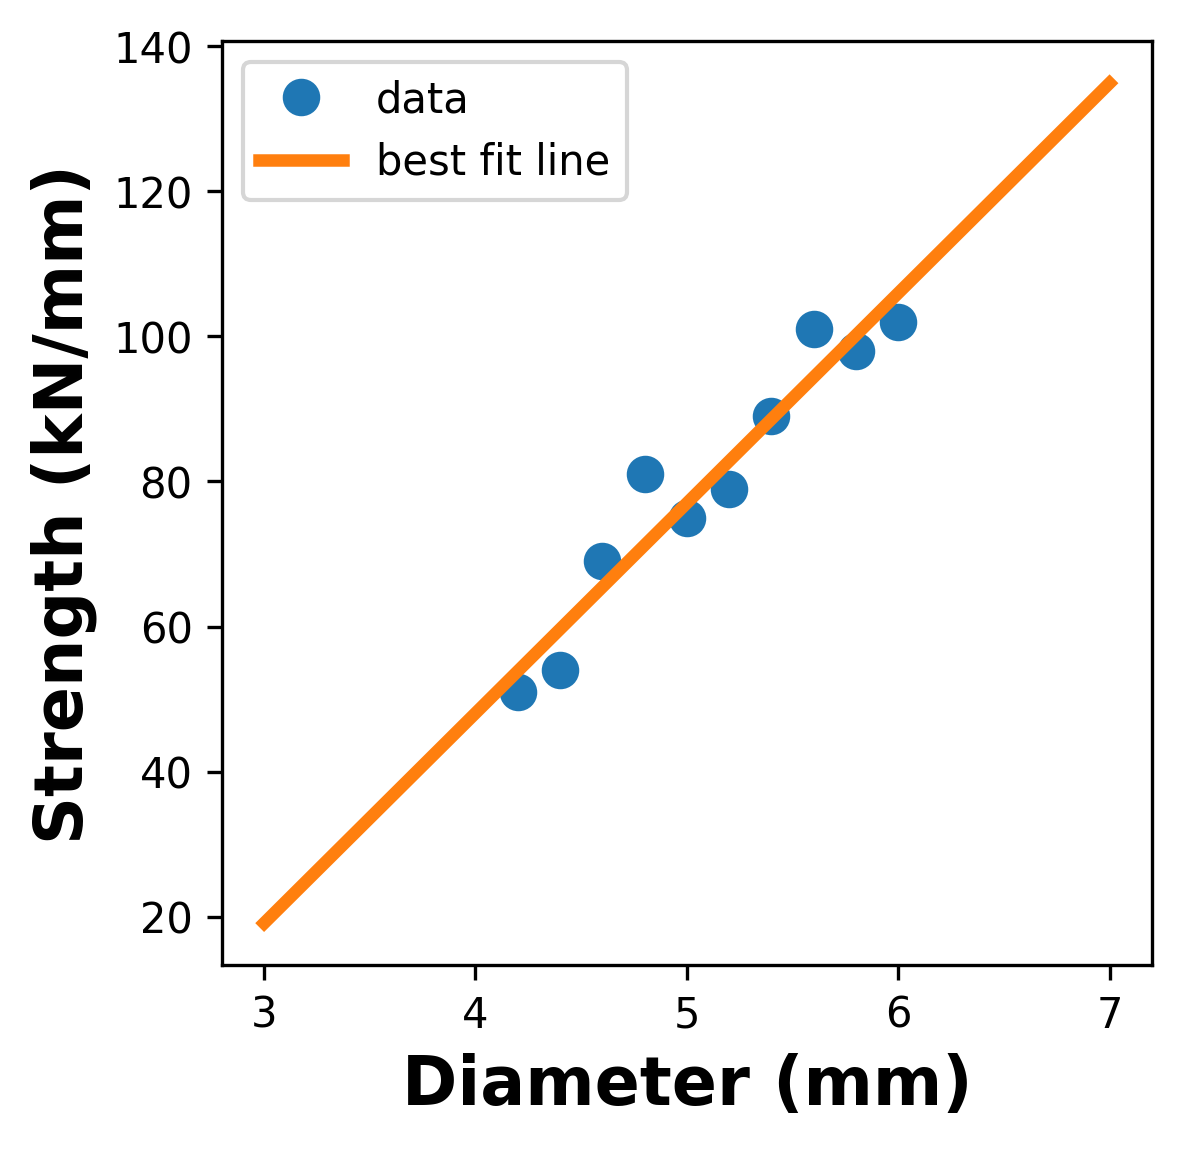

In [ ]:
##BEGIN SOLUTION

# use scipy.stats.linregress to calculate a line of best fit and extract the key info
slope, intercept, r, p, se = stats.linregress(diameter,strength)

# create a lambda function to plot the line of best fit
xline = np.linspace(3,7,10)
y = lambda x: slope*x + intercept
yline = y(xline)

# plot data
plt.figure(figsize=(4,4), dpi=300)
plt.plot(diameter,strength,'o',markersize=8,label="data")
plt.plot(xline,yline,'-',linewidth=3,label="best fit line")
plt.xlabel('Diameter (mm)',fontweight=('bold'),fontsize=16)
plt.ylabel('Strength (kN/mm)',fontweight=('bold'),fontsize=16)
plt.legend()
plt.show()

##END SOLUTION

## 2.2 Calculate the equation for the least-squares line to predict strength based on diameter


Using the equations from 2.1, compute the equation for the least-square line for predicting strength from diameter.

In [ ]:
## BEGIN SOLUTION

# Given data
x = diameter
y = strength

# Calculate the number of data points
n = len(x)

# Calculate averages
xbar = np.mean(x)
ybar = np.mean(y)

# Calculate the numerator
num = (x - xbar).dot(y - ybar)

# Calculate the denominator
denom = (x - xbar).dot(x - xbar)

# Calculate the slope (beta_1)
b1 = num / denom

# Calculate the intercept (beta_0)
b0 = ybar - (b1 * xbar)

# Print results
print("Slope  = {:.2f} kN/mm unit".format(b1))
print("Intercept  = {:.2f} kN".format(b0))

# Print the final equation
print("\nThe least-square line for predicting strength from diameter:")
print("y = {:.2f} + {:.2f}x".format(b0, b1))

##END SOLUTION

Slope  = 28.94 kN/mm unit
Intercept  = -67.69 kN

The least-square line for predicting strength from diameter:
y = -67.69 + 28.94x


## 2.3 Computing the fitted values and the residual for each point

In [ ]:
## BEGIN SOLUTION

# Calculate predicted values (y)
y_predicted = b0 + (x * b1)

# Calculate residuals (ei)
residuals = y - y_predicted

# Create a Pandas DataFrame for the table
data = {
    'Diameter': diameter,
    'Strength': strength,
    'y': y_predicted,
    'ei': residuals
}
df = pd.DataFrame(data)

# Display the table
print(df)
##END SOLUTION

   Diameter  Strength           y        ei
0       4.2        51   53.854545 -2.854545
1       4.4        54   59.642424 -5.642424
2       4.6        69   65.430303  3.569697
3       4.8        81   71.218182  9.781818
4       5.0        75   77.006061 -2.006061
5       5.2        79   82.793939 -3.793939
6       5.4        89   88.581818  0.418182
7       5.6       101   94.369697  6.630303
8       5.8        98  100.157576 -2.157576
9       6.0       102  105.945455 -3.945455


## 2.4 Visualize the Predicted data

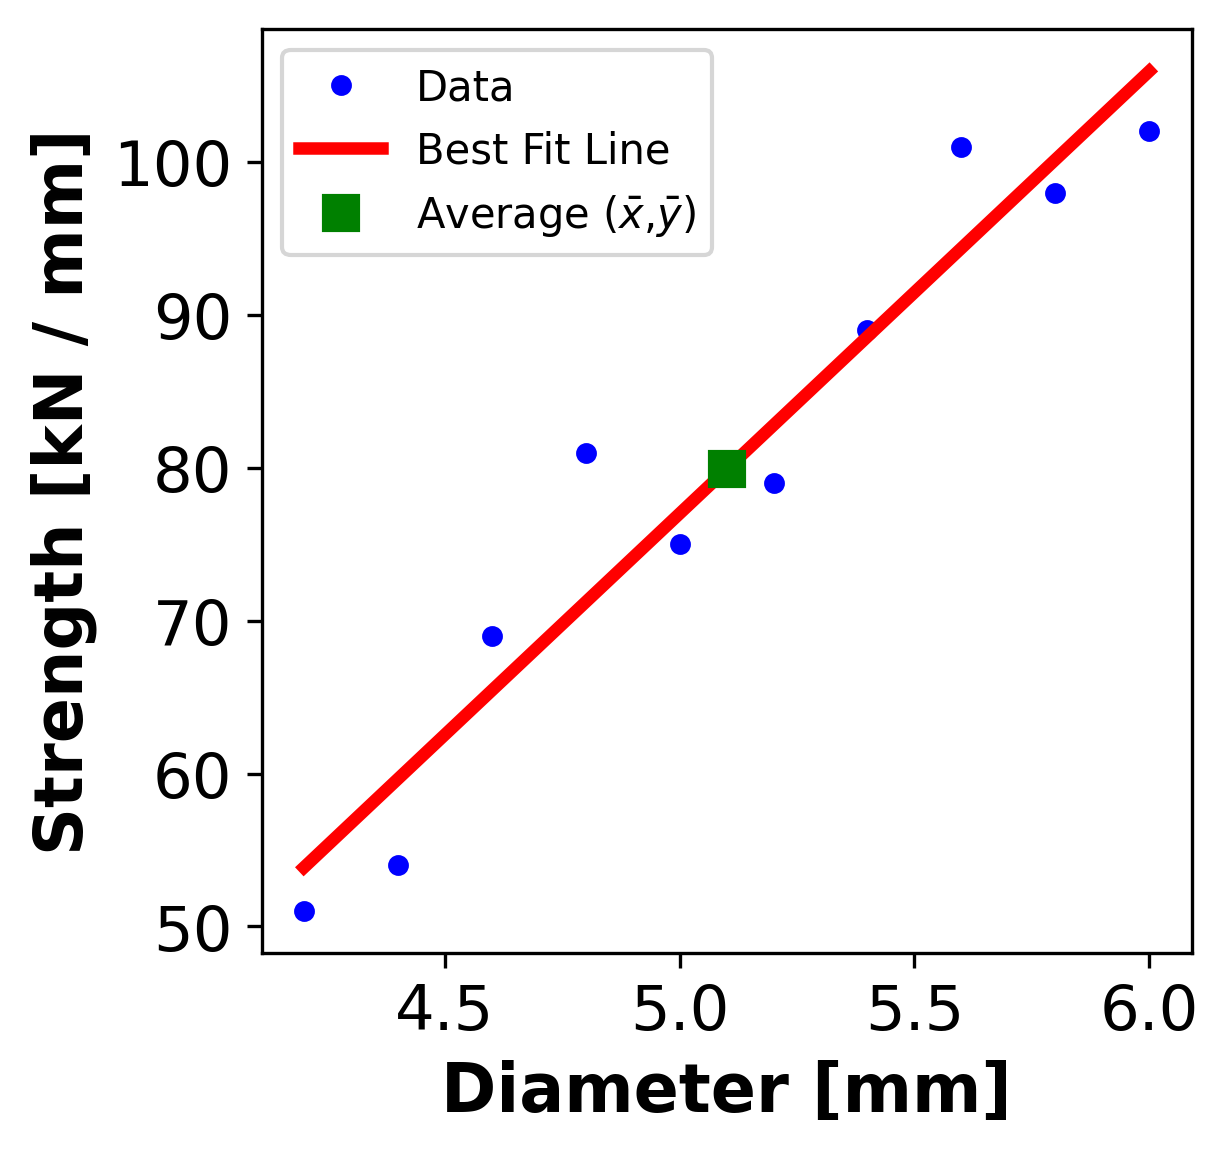

In [ ]:
##BEGIN SOLUTION

# generate predictions
diameter_pred = np.linspace(4.2, 6.0, 10)
y_pred = b0 + b1 * diameter

# create plot
plt.figure(figsize=(4,4), dpi=300)
plt.plot(diameter,strength,'.b',markersize=8,label='Data')
plt.plot(diameter_pred,y_pred,'-r',linewidth=3,label='Best Fit Line')
plt.plot(xbar,ybar,'sg',markersize=8,label=r"Average ($\bar{x}$,$\bar{y}$)")
plt.xlabel('Diameter [mm]',fontweight='bold', fontsize=16)
plt.ylabel('Strength [kN / mm]',fontweight='bold', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.legend()
plt.show()

##END SOLUTION

## 2.5 Plot of residual vs Fitted value
From the table above, we would make a plot of the residual vs fitted value

1. Are there any clear patterns in the residuals?

2. Are there any extreme outliers?

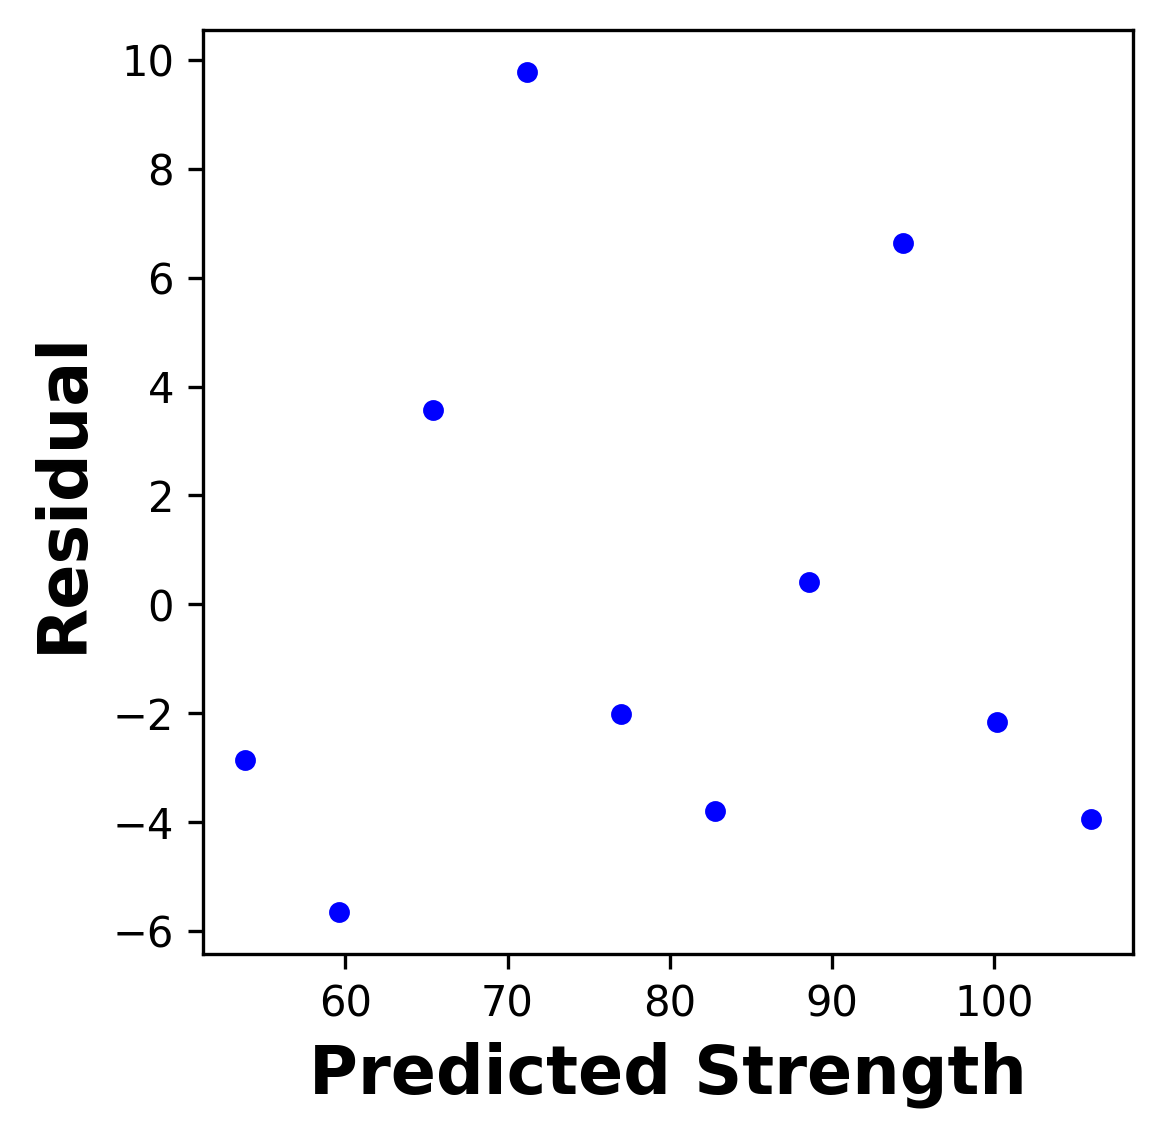

In [ ]:
##BEGIN SOLUTION

# Plot of residual vs fitted value
plt.figure(figsize=(4,4),dpi=300)
plt.plot(y_predicted,residuals,"b.", markersize=8)
plt.xlabel("Predicted Strength",fontweight='bold',fontsize=16)
plt.ylabel("Residual",fontweight='bold',fontsize=16)
plt.grid(False)
plt.show()

##END SOLUTION

# 2.6 Multivariate uncertainty analysis
We can evaluate how good our line of fit matches the data set given to us within a certain confidence interal. In order to calculate it however, there are a few steps to it starting with finding the uncertainty in measurement for this problem.
 $$(Equation2.3): \hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y$$

 The first step to calculating uncertainty is to find $\hat{\beta}$. Once we have beta, then we can move to calculate $\hat\sigma^2$. The formula is listed below.
 $$(Equation2.4): \hat\sigma^2 = Var[y - x\hat{\beta}] = \frac{((y-\hat{y})^T(y-\hat{y}))}{(n-m)} $$

 In this formula, y is the recorded output and x is the predicted value. After calculating sigma, the final step is to then use Equation 2.5 to visualize what our confidence interval is for our regression line.

 $$(Equation2.5): \hat{y} \pm t_{n-m}^{α/2} \sqrt{\hat\sigma^2 + \mathbf{x}_o^T[\hat\sigma^2(\mathbf{X}^T\mathbf{X}^{-1})  ] \mathbf{x}_o } $$



In [ ]:
##BEGIN SOLUTION

# Creating initial matricies
confidence_level = 0.95
n = 10
m = 2
X = np.array([np.ones(len(diameter)), diameter]).transpose()
Y = np.array(strength)

lower_bound = []
upper_bound = []

#Calculating t-score
t_score = abs(stats.t.ppf((1 - confidence_level) / 2, df=n-m-1))

# Calculating beta
beta_hat = nplin.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y

# Calculating sigma hat squared
sigma_hat = math.sqrt((np.transpose(Y - X @ beta_hat) @ (Y - X @ beta_hat)) * (1/(n-m)))

for i in range(len(diameter)):
  # Creating X_o vector
  X_o = [1, diameter[i]]
  # Calculating confidence interval line
  Y_hat_o = np.transpose(X_o) @ beta_hat

  uncertainty = sigma_hat * t_score * math.sqrt(1 + np.transpose(X_o) @ nplin.inv((np.transpose(X) @ X)) @ X_o)

  lower_confidence = Y_hat_o - uncertainty
  lower_bound.append(lower_confidence)

  upper_confidence = Y_hat_o + uncertainty
  upper_bound.append(upper_confidence)

##END SOLUTION

Now that we've solved for the intervals we will be using our calculated values to plot the confidence intervals of our regression line.

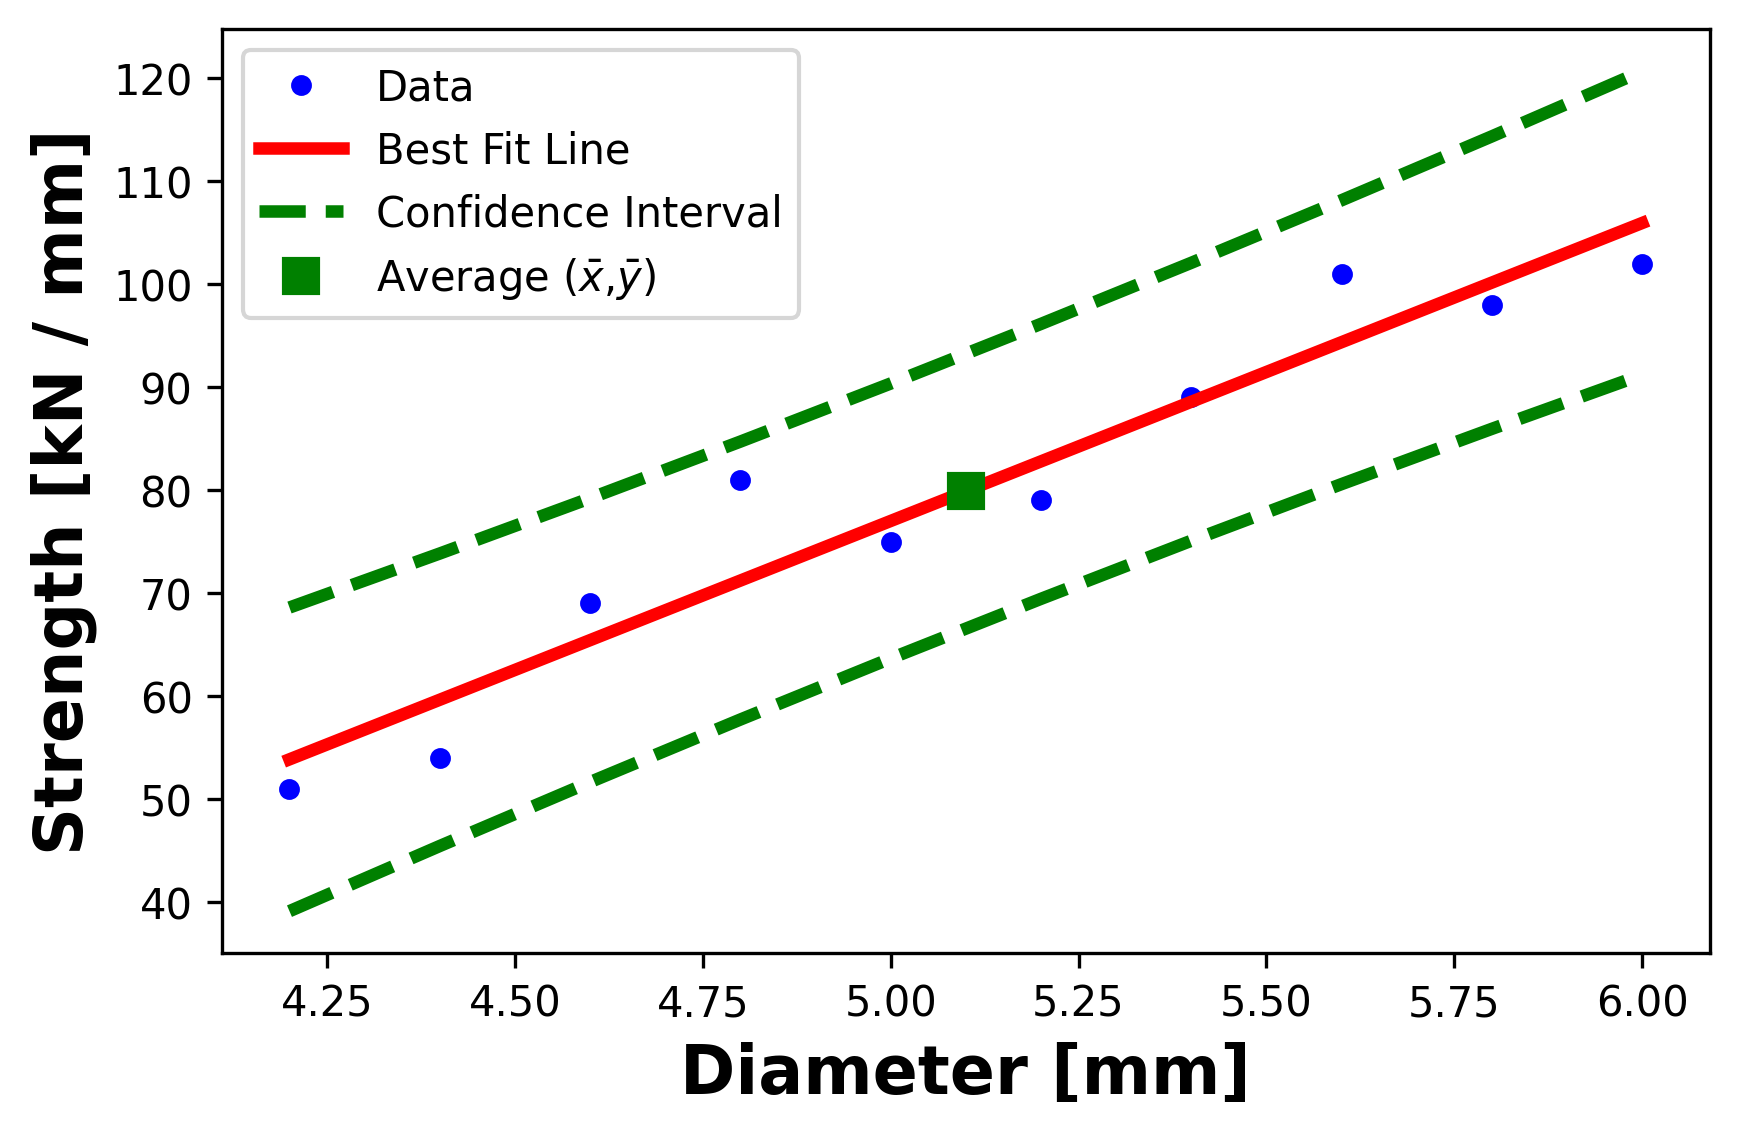

In [ ]:
##BEGIN SOLUTION

# create plot
plt.figure(figsize=(6.4,4),dpi=300)
plt.plot(diameter,strength,'.b',markersize=8,label='Data')
plt.plot(diameter_pred,y_pred,'-r',linewidth=3,label='Best Fit Line')
plt.plot(diameter_pred, upper_bound, '--g',linewidth=3,label='Confidence Interval')
plt.plot(diameter_pred, lower_bound, '--g',linewidth=3)
plt.plot(xbar,ybar,'sg',markersize=8,label=r"Average ($\bar{x}$,$\bar{y}$)")
plt.xlabel('Diameter [mm]',fontweight='bold',fontsize=16)
plt.ylabel('Strength [kN / mm]',fontweight='bold',fontsize=16)
plt.grid(False)
plt.legend()
plt.show()

##END SOLUTION

# 3.0 Analysis
Using previously calculated regression equations, answer the following questions to see how a fitted equation can predict values.

## 3.1 Effect of a 0.3mm Increase in Diameter on Predicted Strength

If the diameter is increased by 0.3mm, by how much would you predicted the strength to increase or decrease?

**Your Answer:**
To estimate the effect of a 0.3mm increase in diameter on predicted strength, we can use the slope of the least-square line obtained from the linear regression analysis. The slope $\hat{\beta_1}$ represents the change in predicted strength for a one-unit increase in diameter.




In [ ]:
##BEGIN SOLUTION

# Calculate the effect of a 0.3mm increase in diameter
effect = 0.3 * b1

# Print the result
print("Effect of a 0.3mm Increase in Diameter on Predicted Strength: {:.2f} kN/mm".format(effect))

##END SOLUTION

Effect of a 0.3mm Increase in Diameter on Predicted Strength: 8.68 kN/mm


## 3.2 Predict the Strength for a Diameter of 5.5mm

In [ ]:
##BEGIN SOLUTION

# Given diameter for prediction
diameter_prediction = 5.5

# Calculate predicted strength for a diameter of 5.5mm
predicted_strength = b0 + b1 * diameter_prediction

# Print the result
print("Predicted Strength for a Diameter of 5.5mm: {:.2f} kN".format(predicted_strength))

##END SOLUTION

Predicted Strength for a Diameter of 5.5mm: 91.48 kN


## 3.3 Predicting Strength for a Diameter of 8mm
Can the least-square line be used to predict the strength for a diameter of 8mm? If so, predict the strength. If not, explain why not.

**Discuss:**
The least-square line can be used to predict the strength for a diameter of 8mm if and only if the prediction falls within the range of the observed data. The validity of predictions beyond the observed range depends on the assumptions made during the linear regression analysis.

In linear regression, it is assumed that the relationship between the independent variable (diameter in this case) and the dependent variable (strength) is linear and that this relationship holds throughout the observed range. Extrapolating the model beyond this range may introduce uncertainty and might not accurately reflect the true relationship.

In [ ]:
##BEGIN SOLUTION

# Slope and Intercept value
b0 = -67.69
b1 = 28.94

# Given diameter for prediction
diameter_prediction = 8.0

# Check if the diameter is within the observed range
if min(diameter) <= diameter_prediction <= max(diameter):
    # Calculate predicted strength for the given diameter
    predicted_strength = b0 + b1 * diameter_prediction
    print("Predicted Strength for a Diameter of {}mm: {:.2f} kN".format(diameter_prediction, predicted_strength))
else:
    print("Warning: The diameter of {}mm is outside the observed range. Predictions may be less reliable.".format(diameter_prediction))

##END SOLUTION

## 3.4 Predicting Diameter for a Strength of 95kN/mm
For what diameter would you need to predict a strength of 95kN/mm?

In [ ]:
##BEGIN SOLUTION

# Given strength for prediction
strength_prediction = 95.0

# Calculate predicted diameter for the given strength
diameter_predicted = (strength_prediction - b0) / b1

# Print the result
print("Predicted Diameter for a Strength of {} kN/mm: {:.2f} mm".format(strength_prediction, diameter_predicted))

##END SOLUTION

Predicted Diameter for a Strength of 95.0 kN/mm: 5.62 mm


# 4. Discussion Questions
**Answer in the given space below**

1) How does an increase in diameter affect the strength of the material?

**Your Answer:**
An increase in diameter can contribute to an increase in tensile strength. This is because a larger cross-sectional area allows the material to distribute the applied load over a greater area, reducing stress.
   

2) If you were asked to predict the what strength a sample would have if the diameter were 20 mm, would you be able to accurately calculate that value? Why or why not?

**Your Answer:**
Predicting the strength for a diameter of 20 mm using the linear regression model may not be accurate if the prediction falls outside the observed range of the data. This is because linear regression models assume that the relationship between variables holds within the observed range, and extrapolation beyond that range introduces uncertainty, hence alternative models or additional data collection within the relevant range may be necessary for more accurate results.

3) After fitting the data, is a linear model the best representation of the given data? If so, how do you know?

**Your Answer:**
A linear model was considered appropriate after the following assumptions were met:

    1. Check for random and symmetric residuals around zero(normal distribution).
    2. Ensure the relationship between variables is approximately linear.
    3. Examine and address potential influential outliers.
    4. Verify constant variability of residuals across all levels.